### Importing libraries

In [88]:
import os
import re
import math
import random
import warnings
from tqdm import tqdm

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv
import gzip

warnings.filterwarnings('ignore')

### Data Preprocessing - Amazon Dataset Compression, Extraction, and Export Script

In [89]:
# Read and process the gzipped CSV file
with gzip.open('../amazon0302.txt.gz', 'rt') as f_in, open('amazon0302.csv', 'w', newline='') as f_out:
    reader = csv.reader(f_in, delimiter='\t')
    writer = csv.writer(f_out)
    writer.writerows(reader)  # Use writerows for efficiency

# Load the processed CSV file into a Pandas DataFrame
dataframe = pd.read_csv('amazon0302.csv', sep='\t', header=None, names=['nodes'])  # Specify column names

# Skip the first 4 rows and reset the index
dataframe = dataframe.iloc[4:].reset_index(drop=True)

# Split the 'nodes' column into 'source' and 'target' columns
dataframe[['source', 'target']] = dataframe['nodes'].str.split(',', expand=True)

# Select the first 5000 rows
dataframe_5000 = dataframe.head(5000)

# Export the data as a CSV file
dataframe_5000.to_csv('amazon_copurchase_5000.csv', index=False)



### Network Specifications

In [90]:
# Create a directed graph from the Pandas DataFrame using NetworkX
g = nx.from_pandas_edgelist(dataframe_5000, source='source', target='target')
print("Is the Graph Directed? ", nx.is_directed(g))

# Create an undirected graph from the Pandas DataFrame using NetworkX
Graph = nx.from_pandas_edgelist(dataframe_5000, 'source', 'target', create_using=nx.Graph)

# Print the number of nodes in the network
print("\nThe Number of Nodes in the Network: ", len(Graph.nodes()))

# Print the number of edges in the network
print("\nThe Number of Edges in the Network are: ", len(Graph.edges()))

Is the Graph Directed?  False

The Number of Nodes in the Network:  1761

The Number of Edges in the Network are:  3894


### Visualization of Amazon Copurchase Network with 5000 Nodes

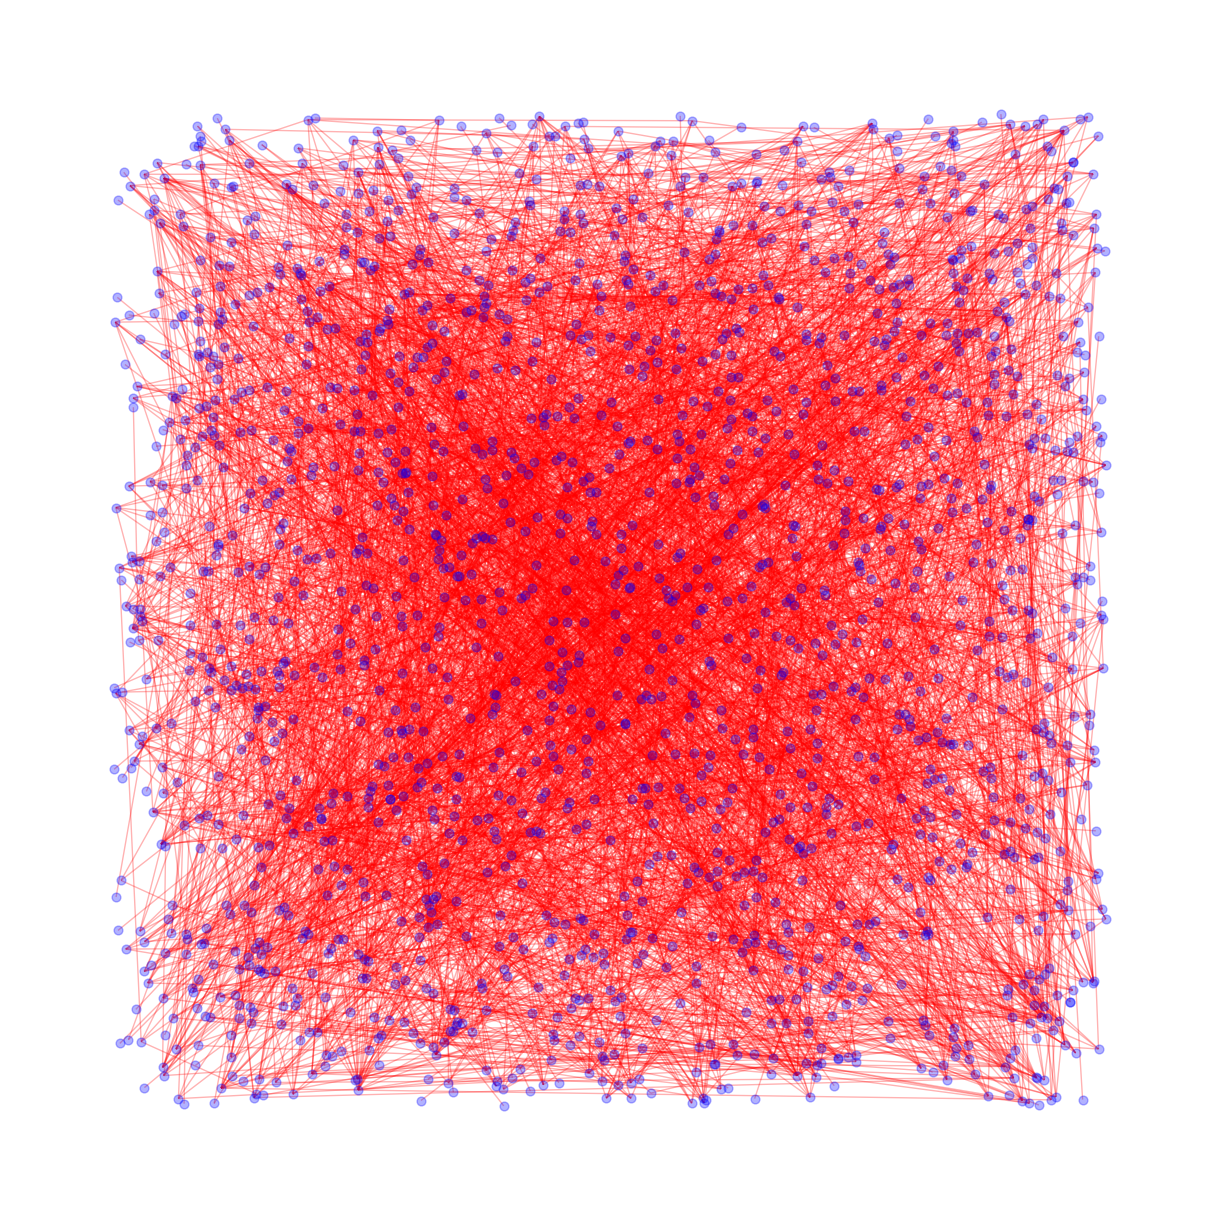

In [91]:
# Visualize the graph
plt.figure(figsize=(12, 12))

# Generate random layout for better visualization
pos = nx.random_layout(Graph, seed=30)

# Draw the graph with specified parameters
nx.draw(Graph, with_labels=False, pos=pos, node_size=40, alpha=0.3, edge_color='red', node_color='blue')

# Set title and turn off axis labels
plt.axis('off')

# Show the graph
plt.show()

### Analysing the network

1. Radius of the network: The minimum eccentricity among all vertices in the network, representing the maximum distance from any vertex to the furthest vertex.

2. Diameter of the network: The maximum eccentricity among all vertices in the network, indicating the longest shortest path between any pair of vertices.

3. Density of the network: The ratio of the number of edges in the network to the total possible number of edges, providing a measure of how interconnected the network is.

In [92]:

print("Network Radius : ", nx.radius(Graph))

print("Network Diameter : ", nx.diameter(Graph))

print("Network Density : ", nx.density(Graph))

Network Radius :  8
Network Diameter :  15
Network Density :  0.0025127768313458264


## Betweenness Centrality

Betweenness centrality quantifies the importance of a node by measuring the frequency with which it lies on the shortest paths between pairs of other nodes in a network, indicating its role as a key mediator of information flow. High betweenness centrality nodes act as critical bridges connecting disparate parts of the network.

### Nodes with the high betweenness centrality

Node with the highest betweenness centrality: 8
Nodes with the highest betweenness centrality: ['8', '18', '30', '346', '481', '302', '33', '112', '20', '151', '345', '13', '193', '342', '99', '21', '78', '976', '11', '28', '133', '374', '512', '14', '97', '98', '17', '238', '719', '717', '7', '226', '223', '317', '479', '27', '29', '216', '22', '23', '93', '150', '449', '248', '303', '80', '964', '227', '330', '445', '63', '154', '788', '4', '367', '355', '913', '819', '476', '861', '117', '407', '368', '197', '372', '190', '196', '632', '930', '450', '115', '114', '1035', '194', '561', '498', '470', '170', '889', '929', '839', '527', '404', '210', '1015', '370', '149', '862', '704', '350', '15', '100', '375', '35', '204', '217', '376', '32', '6', '874', '243', '851', '160', '228', '999', '908', '906', '186', '2', '808', '480', '482', '938', '416', '983', '258', '164', '116', '173', '111', '148', '867', '84', '38', '421', '76', '411', '541', '1', '401', '167', '939', '768', '514', '21

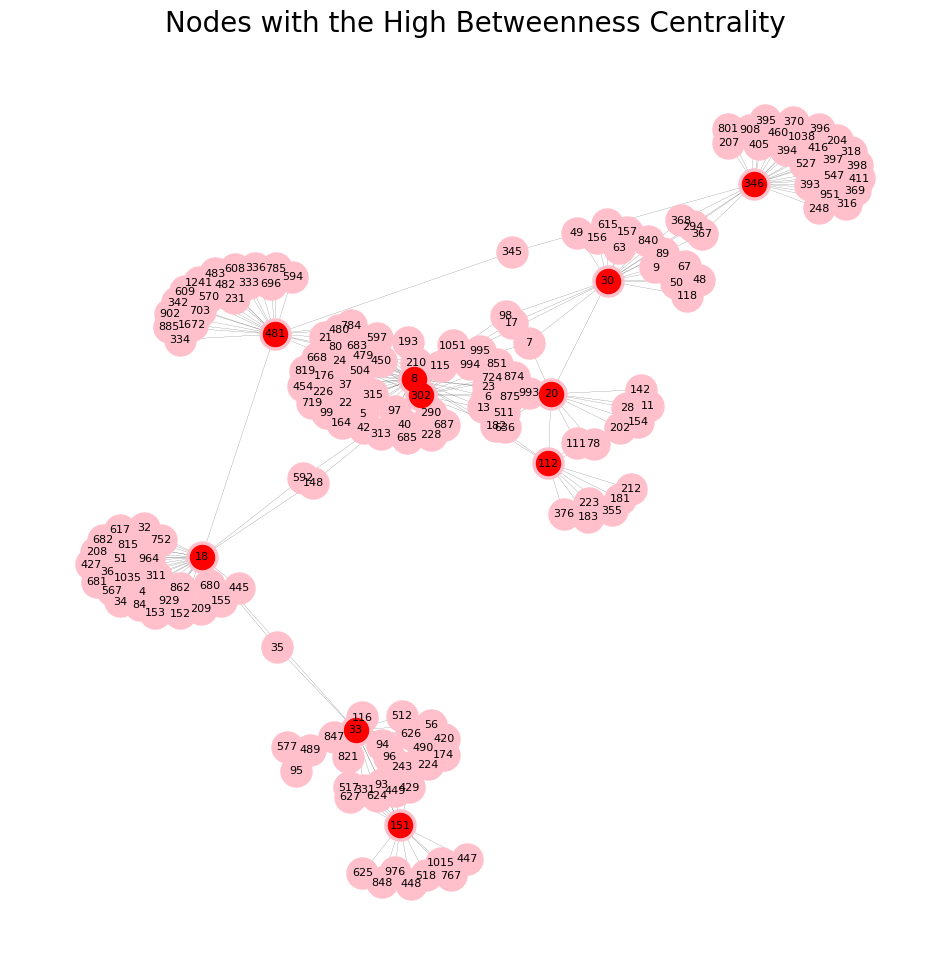

In [93]:
# Calculate betweenness centrality for each node in the graph
betweenness_centrality = nx.betweenness_centrality(Graph)

# Find the node with the highest betweenness centrality
max_betweenness_centrality = max(betweenness_centrality.values())
node_with_max_betweenness_centrality = max(betweenness_centrality, key=betweenness_centrality.get)

# Print the node with the highest betweenness centrality
print("Node with the highest betweenness centrality:", node_with_max_betweenness_centrality)

# Sort the nodes by their betweenness centrality
sorted_nodes = sorted(betweenness_centrality, key=lambda x: betweenness_centrality[x], reverse=True)
print("Nodes with the highest betweenness centrality:", sorted_nodes)

# Visualize the nodes with the highest betweenness centrality
# Create a subgraph containing the top 10 nodes with highest betweenness centrality and their neighbors
G_top_10 = nx.Graph()
top_10_nodes = sorted_nodes[:10]
for node in top_10_nodes:
    G_top_10.add_node(node)
    for neighbor in Graph[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_top_10)
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="pink", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the top 10 nodes with a different color
nx.draw_networkx_nodes(G_top_10, pos, nodelist=top_10_nodes, node_color='red')

# Show the graph
plt.title("Nodes with the High Betweenness Centrality", fontsize=20)
plt.axis('off')
plt.show()

### Nodes with the lowest betweenness centrality

Node with the lowest betweenness centrality: 41
The most distant nodes in the network are ['138', '260', '261', '262', '263', '264', '41', '43', '44', '46']


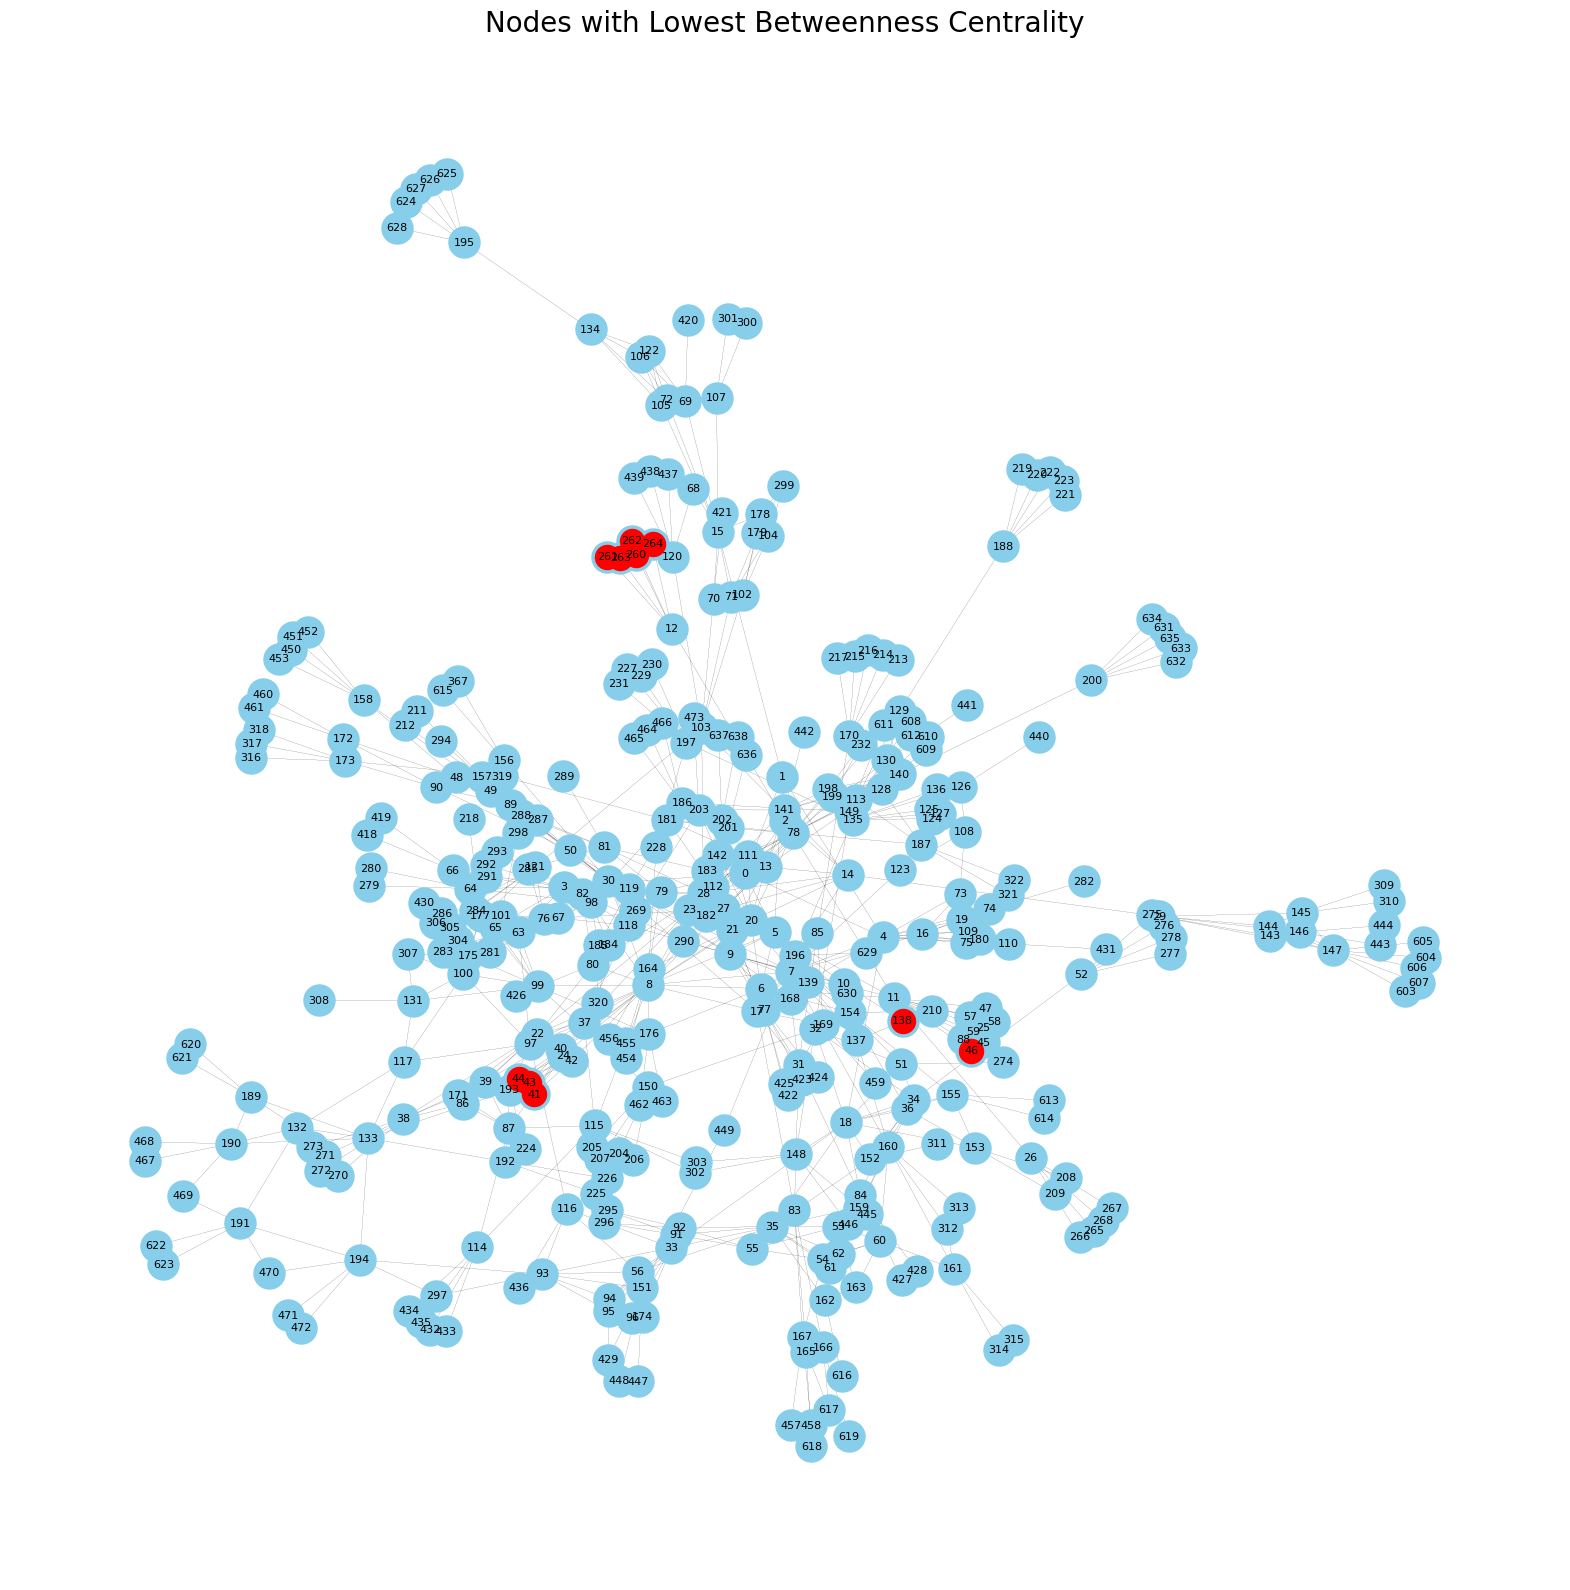

In [94]:
# Find the node with the lowest betweenness centrality
min_betweenness_centrality = min(betweenness_centrality.values())
node_with_min_betweenness_centrality = min(betweenness_centrality, key=betweenness_centrality.get)

# Print the node with the lowest betweenness centrality
print("Node with the lowest betweenness centrality:", node_with_min_betweenness_centrality)

# Plot the most distant nodes

# Create a graph from the dataframe subset
G_subset = nx.from_pandas_edgelist(dataframe_5000[:1000], source='source', target='target')

# Compute betweenness centrality for all nodes
betweenness_centrality_subset = nx.betweenness_centrality(G_subset)

# Find the 10 nodes with the lowest betweenness centrality
most_distant_nodes = sorted(betweenness_centrality_subset, key=betweenness_centrality_subset.get, reverse=False)[:10]
print("The most distant nodes in the network are", most_distant_nodes)

# Visualize the most distant nodes
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_subset)
nx.draw_networkx(G_subset, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)
nx.draw_networkx_nodes(G_subset, pos, nodelist=most_distant_nodes, node_color='red')
plt.title("Nodes with Lowest Betweenness Centrality", fontsize=20)
plt.axis('off')
plt.show()


###  Closeness Centrality

Closeness centrality measures how close a node is to all other nodes in a network, indicating its ability to efficiently interact and disseminate information. Nodes with higher closeness centrality scores are more accessible and influential within the network.

The node with the highest closeness centrality is 8


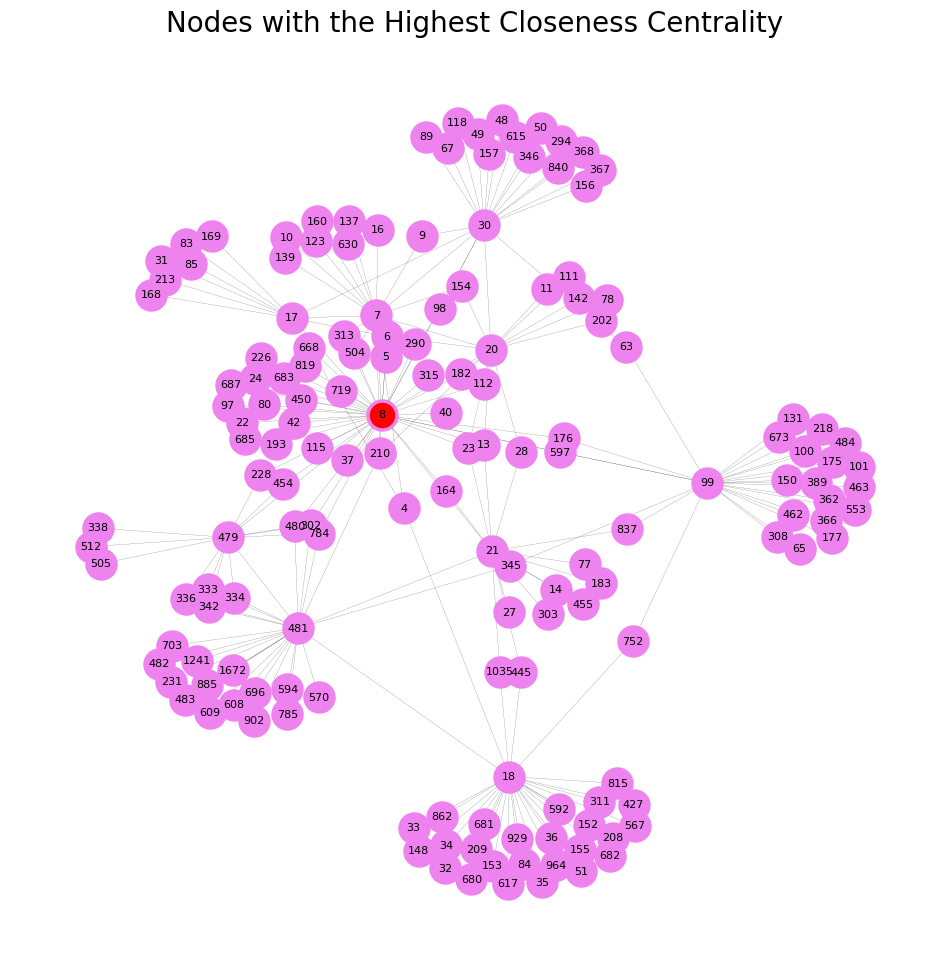

In [95]:
# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(Graph)

# Get the node with the highest closeness centrality
node_with_highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)

# Print the node with the highest closeness centrality
print("The node with the highest closeness centrality is", node_with_highest_closeness_centrality)

# Sort the nodes by closeness centrality
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Create a subgraph containing the top 10 nodes with highest closeness centrality and their neighbors
G_top_10 = nx.Graph()
top_10_nodes = sorted_nodes[:10]
for node in top_10_nodes:
    G_top_10.add_node(node)
    for neighbor in Graph[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_top_10)
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="violet", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the node with the highest closeness centrality
node_with_highest_closeness_centrality = top_10_nodes[0]
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[node_with_highest_closeness_centrality], node_color='red')

# Show the graph
plt.title("Nodes with the Highest Closeness Centrality", fontsize=20)
plt.axis('off')
plt.show()


### Degree Centrality

Degree centrality quantifies the importance of a node in a network by measuring the number of edges connected to it, indicating its level of connectivity or influence. Nodes with higher degree centrality are more central and potentially more influential within the network.

The node with the highest degree centrality is 8


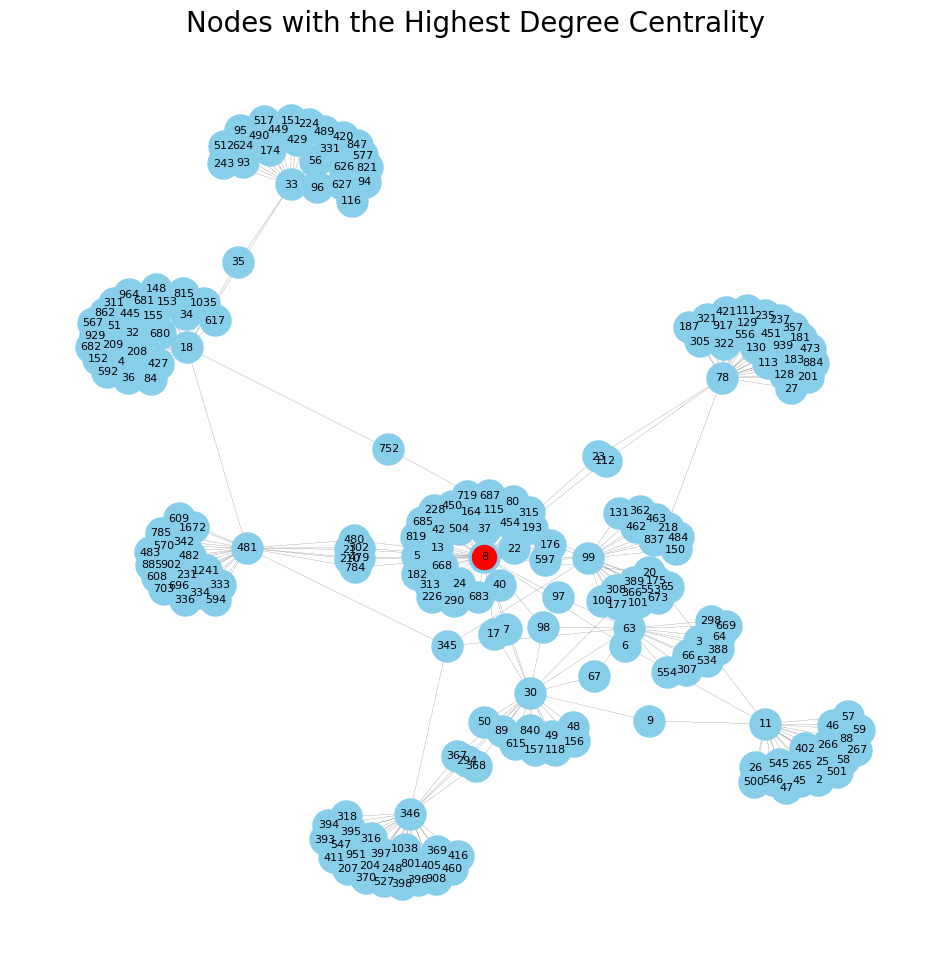

In [96]:
# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(Graph)

# Get the node with the highest degree centrality
node_with_highest_degree_centrality = max(degree_centrality, key=degree_centrality.get)

# Print the node with the highest degree centrality
print("The node with the highest degree centrality is", node_with_highest_degree_centrality)

# Sort the nodes by degree centrality
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Create a subgraph containing the top 10 nodes with highest degree centrality and their neighbors
G_top_10 = nx.Graph()
top_10_nodes = sorted_nodes[:10]
for node in top_10_nodes:
    G_top_10.add_node(node)
    for neighbor in Graph[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_top_10)
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the node with the highest degree centrality
node_with_highest_degree_centrality = top_10_nodes[0]
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[node_with_highest_degree_centrality], node_color='red')

# Show the graph
plt.title("Nodes with the Highest Degree Centrality", fontsize=20)
plt.axis('off')
plt.show()




### Eigenvector centrality

Eigenvector centrality measures the influence of a node in a network based on its connections to other highly influential nodes, assigning higher scores to nodes connected to other nodes with high centrality. It reflects both the number of connections a node has and the importance of those connections in the network.

### 

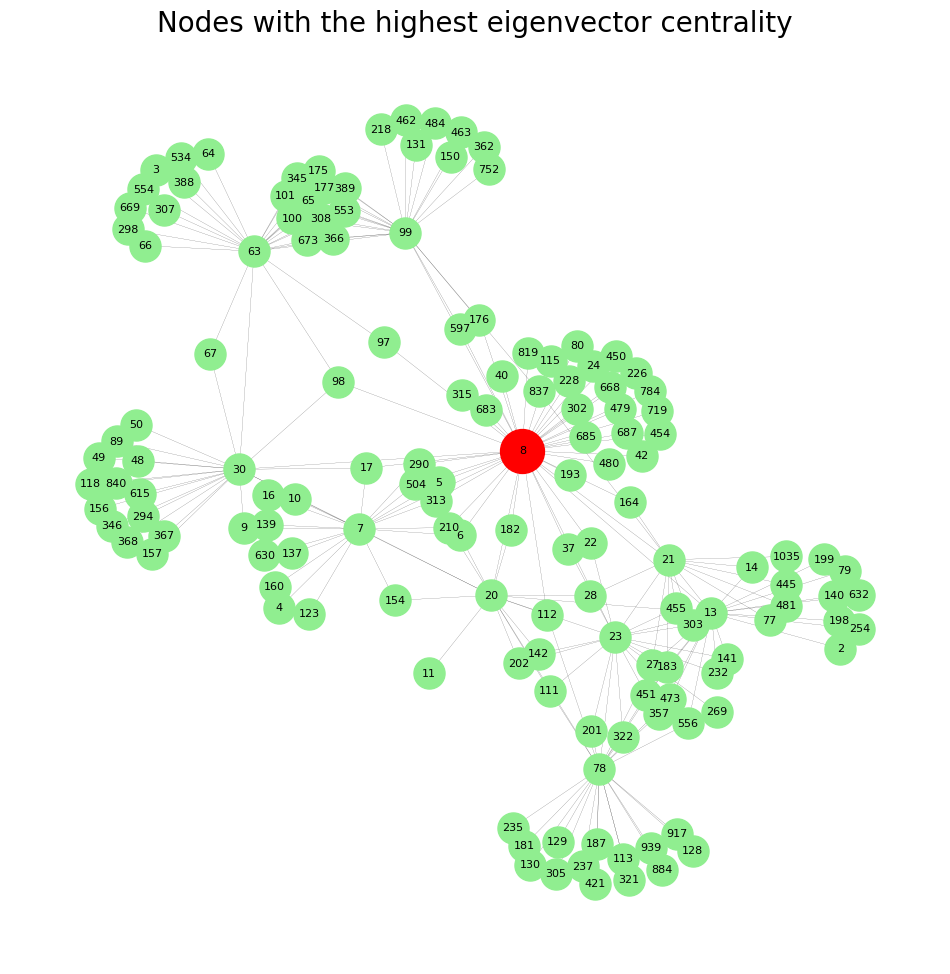

The node with the highest eigenvector centrality is 8


In [97]:

# Computing eigenvector centrality for all nodes
eigenvector_centrality = nx.eigenvector_centrality(Graph)

# Sorting the nodes by their eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=lambda x: eigenvector_centrality[x], reverse=True)

# Visualizing the nodes with the highest eigenvector centrality

# Creating an empty graph for top nodes
G_top_10 = nx.Graph()

# Adding the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in Graph[node]:
        G_top_10.add_edge(node, neighbor)

# Creating a layout for the nodes
pos = nx.spring_layout(G_top_10)

# Visualizing the graph
plt.figure(figsize=(12, 12))

# Drawing the network with labels and attributes
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="lightgreen", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlighting the node with the highest eigenvector similarity
max_sim = 0
max_sim_node = None
for node in sorted_nodes:
    sim = eigenvector_centrality[node]
    if sim > max_sim:
        max_sim = sim
        max_sim_node = node
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[max_sim_node], node_color="red", node_size=1000)

# Displaying the graph
plt.title("Nodes with the highest eigenvector centrality", fontsize=20)
plt.axis('off')  # Turning off axis labels
plt.show()

# Printing the node with highest eigenvector centrality and similarity
print('The node with the highest eigenvector centrality is', sorted_nodes[0])


### PageRank 

PageRank is a link analysis algorithm used to rank web pages in search engine results, based on the idea that important pages are likely to be linked to by other important pages. It assigns a numerical weight to each element of a hyperlinked set of documents, with the purpose of measuring its relative importance within the set.

The node with the highest PageRank is 8


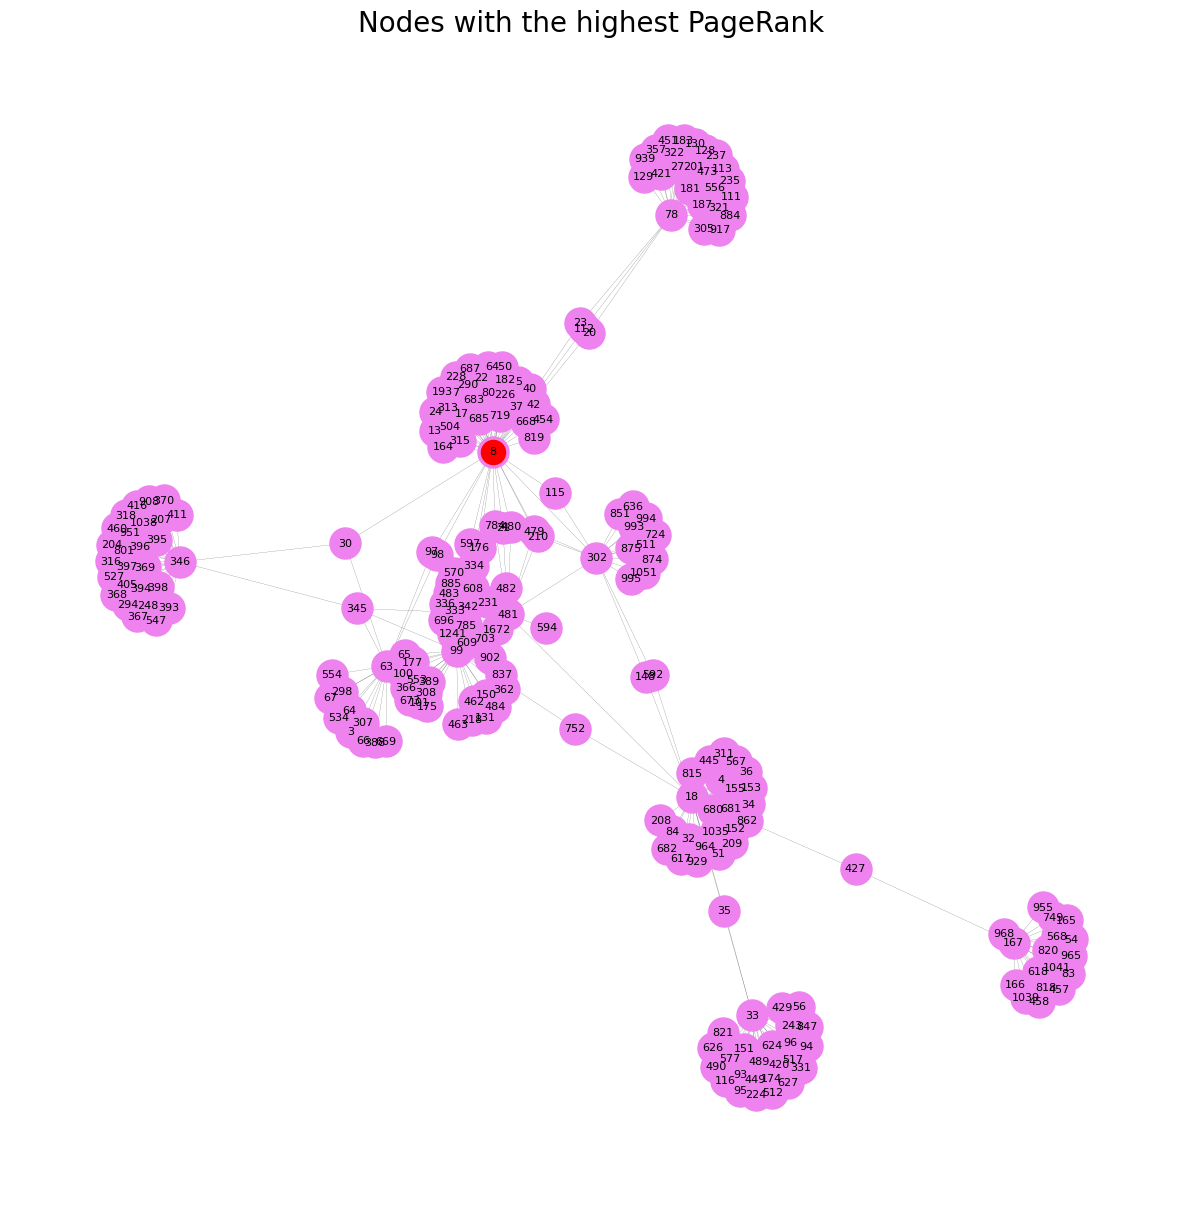

In [98]:

# Computing PageRank for all nodes
page_rank = nx.pagerank(Graph)
sorted_nodes = sorted(page_rank, key=lambda x: page_rank[x], reverse=True)

# Printing the node with highest PageRank
print('The node with the highest PageRank is', sorted_nodes[0])

# Visualizing the nodes with the highest PageRank

# Creating an empty graph for top nodes
G_top_10 = nx.Graph()

# Adding the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in Graph[node]:
        G_top_10.add_edge(node, neighbor)

# Creating a layout for the nodes
pos = nx.spring_layout(G_top_10)

# Visualizing the graph
plt.figure(figsize=(15, 15))

# Drawing the network with labels and attributes
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="violet", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlighting the node with the highest PageRank
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[sorted_nodes[0]], node_color="red")

# Displaying the graph
plt.title("Nodes with the highest PageRank", fontsize=20)
plt.axis('off')  # Turning off axis labels
plt.show()


### Community Detection by Girvan-Newman Algorithm 

The Girvan-Newman algorithm is a hierarchical method for detecting communities in complex networks. It works by iteratively removing edges with the highest betweenness centrality, effectively breaking the graph into distinct communities. This process continues until the optimal community structure is identified, producing a hierarchical tree of communities.

In [99]:
# Importing community algorithm to detect communities within a graph
from networkx.algorithms import community 
from scipy.cluster import hierarchy


# Using Girvan-Newman algorithm to detect communities
fetch_communities = community.girvan_newman(G_subset)
top_communities = next(fetch_communities)
next_communities = next(fetch_communities)
# Sorting and printing the communities detected by Girvan-Newman algorithm
communities_girvan_newman = sorted(map(sorted, next_communities))
print(communities_girvan_newman)


[['0', '1', '10', '100', '101', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '135', '136', '137', '138', '139', '14', '140', '141', '142', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '23', '230', '231', '232', '24', '25', '26', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '27', '270',

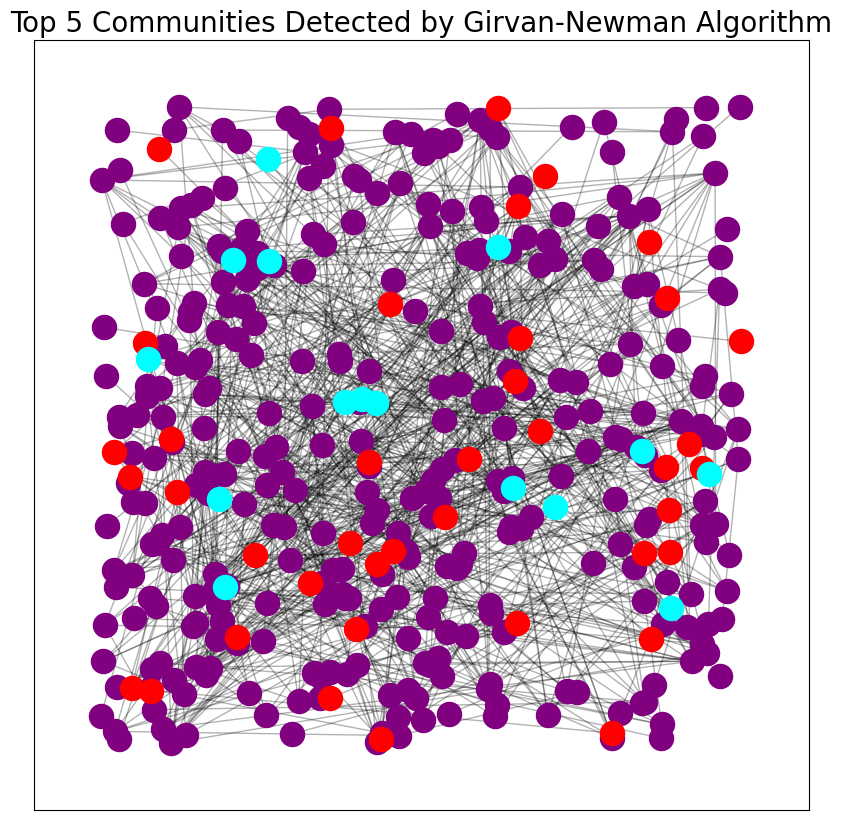

In [100]:
# Create a layout for the nodes using random layout with a specified seed for reproducibility
pos = nx.random_layout(G_subset, seed=23)

# Define colors for communities
colors = ['purple', 'red', 'cyan', 'yellow', 'orange', 'purple', 'black', 'brown', 'pink']

# Create a new figure for the plot
plt.figure(figsize=(10, 10))

# Set title for the plot
plt.title("Top 5 Communities Detected by Girvan-Newman Algorithm", fontsize=20)

# Plotting nodes for each of the top 5 communities
for i, community in enumerate(communities_girvan_newman[:5]):
    nx.draw_networkx_nodes(G_subset, pos, community, node_color=colors[i])

# Plotting edges with reduced transparency
nx.draw_networkx_edges(G_subset, pos, alpha=0.3)

# Display the plot
plt.show()


## Generate the customers identified by Girvan Newman Communities

In [103]:
import ast
from collections import Counter

df = pd.read_csv('../amazon_customer_data.csv')
df_book = df[['id','ASIN','cutomer_id']]



for idx, comm in enumerate(communities_girvan_newman, start=1):
    customer_ids = []
    community_int = [eval(i) for i in comm]
    matching_rows = df_book[df_book["id"].isin(community_int)]
    
    for index, row in matching_rows.iterrows():
        list_of_strings = row['cutomer_id']
        list_of_strings_1 = ast.literal_eval(list_of_strings)
        
        for i in list_of_strings_1:
            customer_ids.append(i)
    
    counter = Counter(customer_ids)
    top_2 = counter.most_common(2)
    
    # Print the header for the community
    print(f"\nCommunity {idx}:")
    print("---------------")
    
    # Print the top customers for the community
    print("The top customers identified by the community are:")
    for customer, count in top_2:
        print(f"Customer ID: {customer}, Count: {count}")





Community 1:
---------------
The top customers identified by the community are:
Customer ID: 3UN6WX5RRO2AG, Count: 76
Customer ID: 1IX3X8IVQ237L, Count: 20

Community 2:
---------------
The top customers identified by the community are:
Customer ID: 3IPNX3AJUY5JO, Count: 3
Customer ID: 3M8S6H1C97RME, Count: 2

Community 3:
---------------
The top customers identified by the community are:
Customer ID: 3PMX6ICVVT2G7, Count: 2
Customer ID: 3QY1SGP2L1H9Y, Count: 2


## Calculate the Modularity Score for the Girvan Newman Communities

In [106]:
from networkx.algorithms import community 
# calculate the modularity score
modularity = community.modularity(G_subset, communities_girvan_newman)

# print the modularity score
print("The modularity score of Girvan Newman communities is", modularity)


The modularity score of Girvan Newman communities is 0.20985850572218268


## Use the Louvain algorithm for community detection and plot the communities.

[['0', '1', '109', '110', '12', '16', '180', '19', '2', '260', '261', '262', '263', '264', '282', '4', '431', '73', '74', '75'], ['10', '137', '138', '139', '154', '165', '166', '167', '168', '169', '17', '170', '210', '213', '214', '215', '216', '217', '31', '457', '458', '459', '5', '6', '617', '618', '619', '7', '83', '85', '9'], ['100', '101', '118', '119', '131', '175', '177', '184', '185', '186', '218', '279', '280', '281', '298', '3', '307', '308', '320', '418', '419', '430', '464', '465', '466', '63', '64', '65', '66', '67', '98', '99'], ['102', '103', '104', '105', '106', '107', '120', '122', '134', '15', '178', '179', '195', '299', '300', '301', '420', '421', '437', '438', '439', '624', '625', '626', '627', '628', '68', '69', '70', '71', '72'], ['108', '123', '124', '125', '126', '127', '135', '136', '197', '227', '229', '230', '231', '440'], ['11', '25', '26', '265', '266', '267', '268', '45', '46', '47', '57', '58', '59', '88'], ['111', '112', '113', '128', '129', '13', '13

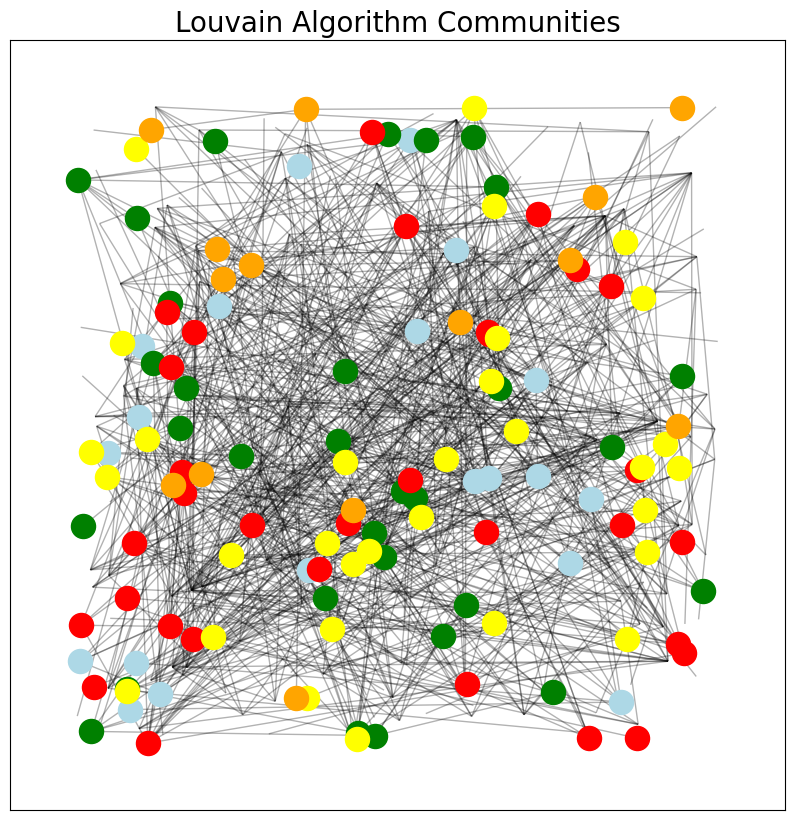

In [107]:
# Use louvain method for community detection and plot the communities with different colors

import numpy as np
import networkx as nx
from networkx.algorithms import community #use community algorithm to detect communities within a graph
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(dataframe[:1000], source='source', target='target')

# print communities within the graph
get_communities = True
if get_communities == True:
    find_communities = community.louvain_communities(G)
    communities_louvain = sorted(map(sorted, find_communities))
    print(communities_louvain)

# Plot the top 5 communities


# Create a layout for the nodes
pos = nx.random_layout(G, seed=23)

colors = ['lightblue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'pink']


plt.figure(figsize=(10,10))

plt.title("Louvain Algorithm Communities", fontsize = 20 )

for i, community in enumerate(communities_louvain[:5]):

  nx.draw_networkx_nodes(G, pos, community, node_color=colors[i])

nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()


## Generate the customers identified by Louvain Communities

In [110]:
import ast
from collections import Counter

df = pd.read_csv('../amazon_customer_data.csv')
df_book = df[['id','ASIN','cutomer_id']]



for idx, community in enumerate(communities_louvain, start=1):
    customer_ids = []
    community_int = [eval(i) for i in community]
    matching_rows = df_book[df_book["id"].isin(community_int)]
    
    for index, row in matching_rows.iterrows():
        list_of_strings = row['cutomer_id']
        list_of_strings_1 = ast.literal_eval(list_of_strings)
        
        for i in list_of_strings_1:
            customer_ids.append(i)
    
    counter = Counter(customer_ids)
    top_2 = counter.most_common(2)
    
    # Print the header for the community
    print(f"\nCommunity {idx}:")
    print("---------------")
    
    # Print the top customers for the community
    print("The top customers identified by the community are:")
    for customer, count in top_2:
        print(f"Customer ID: {customer}, Count: {count}")


Community 1:
---------------
The top customers identified by the community are:
Customer ID: 3UN6WX5RRO2AG, Count: 7
Customer ID: 172VRBP4BZXK6, Count: 5

Community 2:
---------------
The top customers identified by the community are:
Customer ID: 3UN6WX5RRO2AG, Count: 13
Customer ID: 1R9VQHX7F0FJB, Count: 3

Community 3:
---------------
The top customers identified by the community are:
Customer ID: 3KY46BJAF8IPK, Count: 2
Customer ID: 10Q0X7V0DUJ5I, Count: 2

Community 4:
---------------
The top customers identified by the community are:
Customer ID: 3IPNX3AJUY5JO, Count: 3
Customer ID: 3M8S6H1C97RME, Count: 2

Community 5:
---------------
The top customers identified by the community are:
Customer ID: 1IC0940622GBZ, Count: 2
Customer ID: 1FN4GVEW1FEX4, Count: 1

Community 6:
---------------
The top customers identified by the community are:
Customer ID: 1CPHO0OD620YD, Count: 2
Customer ID: 1HH78PMCVVEDZ, Count: 2

Community 7:
---------------
The top customers identified by the com

## Compute the Modularity Score for the Louvain Communities

In [111]:
from networkx.algorithms import community 
# calculate the modularity score
modularity = community.modularity(G_subset, communities_louvain)

# print the modularity score
print("The modularity score of Louvain communities is", modularity)

The modularity score of Louvain communities is 0.7941166574983892
